In [ ]:
# Importing required Libraries
%reset
import pandas as pd
import numpy as np
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim # for gradient descent
import torchvision 
from torchvision import datasets, models, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt # for plotting
import os

torch.manual_seed(1000) # set the random seed

'''
#download mnist data
from torchvision import datasets, transforms
mnist_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)
mnist_train = mnist_data[:4096]
mnist_val   = mnist_data[4096:5120]
'''

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


"\n#download mnist data\nfrom torchvision import datasets, transforms\nmnist_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())\nmnist_data = list(mnist_data)\nmnist_train = mnist_data[:4096]\nmnist_val   = mnist_data[4096:5120]\n"

In [ ]:
# Baseline model: Random Forest
# Test by modifying data file's directory to data location.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import image data
duration_list = torchvision.datasets.ImageFolder("/content/gdrive/My Drive/OMR/",torchvision.transforms.ToTensor())
duration_loader = torch.utils.data.DataLoader(duration_list,
                                          batch_size=5000,
                                          shuffle=True,
                                          num_workers=1)
dataiter = iter(duration_loader)
temp_images, temp_labels = dataiter.next()

# temp_images and temp_labels contain original images and labels
temp_images = temp_images.numpy() 
temp_labels = temp_labels.numpy()  

In [ ]:
# check if data loaded correctly
print(temp_images.shape)

# re-order the Height, width and RGB colors to successfully plot images
images=np.transpose(temp_images,(0, 2, 3, 1))
print(images.shape)

(5000, 3, 64, 64)
(5000, 64, 64, 3)


1


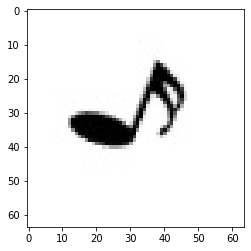

In [ ]:
# check if labels match images and is an index for both images and labels
ind=4
plt.imshow(images[ind])
print(temp_labels[ind])

In [ ]:
# convert the image np array(:, :, :, :) to a 2D flattened table(:,:)
duration_flatten=images.reshape((5000, 64*64*3))

# convert the label np array(:, :, :, :) to a 2D flattened table(:,:)
label_flatten=temp_labels.reshape((5000,1))

# prepare column names for image pixels and labels
pre_column=[]
for i in range(64*64):
    for j in range(3):
        if j==0:
            pre_column.append('pixel' + str(i)+'R') 
        elif j==1:
            pre_column.append('pixel' + str(i)+'G') 
        elif j==2:
            pre_column.append('pixel' + str(i)+'B') 

# Generate panda.DataFrame by 2D tables above
duration_df=pd.DataFrame(duration_flatten,columns=pre_column)
duration_label_df = pd.DataFrame(label_flatten,columns=['labels'])


In [ ]:
# Get dimensions of image pixels
print(duration_df.shape)
# Only need 5 rows to check data frame
duration_df.head()


(5000, 12288)


,pixel0R,pixel0G,pixel0B,pixel1R,pixel1G,pixel1B,pixel2R,pixel2G,pixel2B,pixel3R,pixel3G,pixel3B,pixel4R,pixel4G,pixel4B,pixel5R,pixel5G,pixel5B,pixel6R,pixel6G,pixel6B,pixel7R,pixel7G,pixel7B,pixel8R,pixel8G,pixel8B,pixel9R,pixel9G,pixel9B,pixel10R,pixel10G,pixel10B,pixel11R,pixel11G,pixel11B,pixel12R,pixel12G,pixel12B,pixel13R,...,pixel4082B,pixel4083R,pixel4083G,pixel4083B,pixel4084R,pixel4084G,pixel4084B,pixel4085R,pixel4085G,pixel4085B,pixel4086R,pixel4086G,pixel4086B,pixel4087R,pixel4087G,pixel4087B,pixel4088R,pixel4088G,pixel4088B,pixel4089R,pixel4089G,pixel4089B,pixel4090R,pixel4090G,pixel4090B,pixel4091R,pixel4091G,pixel4091B,pixel4092R,pixel4092G,pixel4092B,pixel4093R,pixel4093G,pixel4093B,pixel4094R,pixel4094G,pixel4094B,pixel4095R,pixel4095G,pixel4095B
0,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [ ]:
# Get dimensions of labels 
print(duration_label_df.shape)
duration_label_df.head()

(5000, 1)


,labels
0,0
1,1
2,4
3,2
4,1


In [ ]:
# Combine two data frames together
# Users can easily read, predict and check the data
readable_duration_df = pd.concat([duration_df, duration_label_df], axis=1)
readable_duration_df.head()

,pixel0R,pixel0G,pixel0B,pixel1R,pixel1G,pixel1B,pixel2R,pixel2G,pixel2B,pixel3R,pixel3G,pixel3B,pixel4R,pixel4G,pixel4B,pixel5R,pixel5G,pixel5B,pixel6R,pixel6G,pixel6B,pixel7R,pixel7G,pixel7B,pixel8R,pixel8G,pixel8B,pixel9R,pixel9G,pixel9B,pixel10R,pixel10G,pixel10B,pixel11R,pixel11G,pixel11B,pixel12R,pixel12G,pixel12B,pixel13R,...,pixel4083R,pixel4083G,pixel4083B,pixel4084R,pixel4084G,pixel4084B,pixel4085R,pixel4085G,pixel4085B,pixel4086R,pixel4086G,pixel4086B,pixel4087R,pixel4087G,pixel4087B,pixel4088R,pixel4088G,pixel4088B,pixel4089R,pixel4089G,pixel4089B,pixel4090R,pixel4090G,pixel4090B,pixel4091R,pixel4091G,pixel4091B,pixel4092R,pixel4092G,pixel4092B,pixel4093R,pixel4093G,pixel4093B,pixel4094R,pixel4094G,pixel4094B,pixel4095R,pixel4095G,pixel4095B,labels
0,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

In [ ]:
# Split the transaction dataset into a training dataset and a test dataset with a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(readable_duration_df.drop('labels', axis = 1), 
                                                    readable_duration_df['labels'], test_size = 0.30, 
                                                    random_state = 1000)

In [ ]:
# Instantiate a scikit-learn random forest model
rf_model = RandomForestClassifier()

In [ ]:
# Use the training dataset to fit the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Test the trained RF model on the training dataset
rf_train_res = rf_model.predict(x_train)

In [ ]:
# Test the trained RF model on the test dataset
rf_test_res = rf_model.predict(x_test)

In [ ]:
# Display the classification report for train
print(classification_report(y_train, rf_train_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       711
           1       1.00      1.00      1.00       700
           2       1.00      1.00      1.00       685
           3       1.00      1.00      1.00       693
           4       1.00      1.00      1.00       711

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



In [ ]:
# Display the classification report for test
print(classification_report(y_test, rf_test_res))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       289
           1       0.96      0.95      0.95       300
           2       0.96      0.97      0.97       315
           3       0.95      0.96      0.96       307
           4       0.94      0.91      0.93       289

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500



In [ ]:
# Display the confusion matrix
print(confusion_matrix(y_test, rf_test_res))

[[289   0   0   0   0]
 [  1 284   0   0  15]
 [  1   0 307   7   0]
 [  1   1   8 296   1]
 [  1  12   5   7 264]]
